## Employee churn prediction

In [1]:
import plotly.express as px
import plotly as py 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn import preprocessing

## 1 Data Collection

In [2]:
#Reading csv file in pandas dataframe format. 
empdf=pd.read_csv(r"D:\Project\emp.csv")
pd.set_option("display.max_columns", None)
empdf.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [3]:
empdf.shape

(1470, 35)

In [4]:
#Get list of columns in the dataset
empdf.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
# Checking the data types of all the columns
empdf.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

## 2.Data Cleaning

In [6]:
#Find number of missing values in every feature. 
empdf.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
#returning total number of duplicates entries
empdf.duplicated().sum()

0

In [8]:
#Columns with string values
categorical_column = ['Attrition', 'BusinessTravel', 'Department','EducationField',
                      'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
#Deep copy the original data
df = empdf.copy(deep=True)
#Use Scikit-learn label encoding to encode character data
lab_enc = preprocessing.LabelEncoder()
for col in categorical_column:
        df[col] = lab_enc.fit_transform(empdf[col])
        le_name_mapping = dict(zip(lab_enc.classes_, lab_enc.transform(lab_enc.classes_)))
        print('Feature', col)
        print('mapping', le_name_mapping)


Feature Attrition
mapping {'No': 0, 'Yes': 1}
Feature BusinessTravel
mapping {'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely': 2}
Feature Department
mapping {'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}
Feature EducationField
mapping {'Human Resources': 0, 'Life Sciences': 1, 'Marketing': 2, 'Medical': 3, 'Other': 4, 'Technical Degree': 5}
Feature Gender
mapping {'Female': 0, 'Male': 1}
Feature JobRole
mapping {'Healthcare Representative': 0, 'Human Resources': 1, 'Laboratory Technician': 2, 'Manager': 3, 'Manufacturing Director': 4, 'Research Director': 5, 'Research Scientist': 6, 'Sales Executive': 7, 'Sales Representative': 8}
Feature MaritalStatus
mapping {'Divorced': 0, 'Married': 1, 'Single': 2}
Feature OverTime
mapping {'No': 0, 'Yes': 1}


In [9]:
empdf=df.drop(["EmployeeCount","EmployeeCount","EmployeeNumber","Over18","StandardHours"],axis=1,)

In [10]:
empdf.head()

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
0          2               1                        2       0          94   
1          1               1                        3       1          61   
2          2               4                        4       1          92   
3          4               1                        4       0          56   
4          1               3                        1       1          40   

   JobInvolvement  JobLevel  JobRole  JobSatisfaction  MaritalStatus  \
0               3         2        7                4              2   
1               2         2        6                2              1   
2               2         1        2                3              2   
3               3         1        6                3              1   
4               3         1        2                2              1   

   MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  \
0           5993        19479                   8         1   
1           5130        24907                   1         0   
2           2090         2396                   6         1   
3           2909        23159                   1         1   
4           3468        16632                   9         0   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                 11                  3                         1   
1                 23                  4                         4   
2                 15                  3                         2   
3                 11                  3                         3   
4                 12                  3                         4   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [11]:
empdf.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLast

## EDA (EXPLORATORY DATA ANALYSIS)

### descriptive statistics


In [12]:
# Check the descriptive statistics of variables
empdf.describe()

Age    Attrition  BusinessTravel    DailyRate   Department  \
count  1470.000000  1470.000000     1470.000000  1470.000000  1470.000000   
mean     36.923810     0.161224        1.607483   802.485714     1.260544   
std       9.135373     0.367863        0.665455   403.509100     0.527792   
min      18.000000     0.000000        0.000000   102.000000     0.000000   
25%      30.000000     0.000000        1.000000   465.000000     1.000000   
50%      36.000000     0.000000        2.000000   802.000000     1.000000   
75%      43.000000     0.000000        2.000000  1157.000000     2.000000   
max      60.000000     1.000000        2.000000  1499.000000     2.000000   

       DistanceFromHome    Education  EducationField  EnvironmentSatisfaction  \
count       1470.000000  1470.000000     1470.000000              1470.000000   
mean           9.192517     2.912925        2.247619                 2.721769   
std            8.106864     1.024165        1.331369                 1.093082   
min            1.000000     1.000000        0.000000                 1.000000   
25%            2.000000     2.000000        1.000000                 2.000000   
50%            7.000000     3.000000        2.000000                 3.000000   
75%           14.000000     4.000000        3.000000                 4.000000   
max           29.000000     5.000000        5.000000                 4.000000   

            Gender   HourlyRate  JobInvolvement     JobLevel      JobRole  \
count  1470.000000  1470.000000     1470.000000  1470.000000  1470.000000   
mean      0.600000    65.891156        2.729932     2.063946     4.458503   
std       0.490065    20.329428        0.711561     1.106940     2.461821   
min       0.000000    30.000000        1.000000     1.000000     0.000000   
25%       0.000000    48.000000        2.000000     1.000000     2.000000   
50%       1.000000    66.000000        3.000000     2.000000     5.000000   
75%       1.000000    83.750000        3.000000     3.000000     7.000000   
max       1.000000   100.000000        4.000000     5.000000     8.000000   

       JobSatisfaction  MaritalStatus  MonthlyIncome   MonthlyRate  \
count      1470.000000    1470.000000    1470.000000   1470.000000   
mean          2.728571       1.097279    6502.931293  14313.103401   
std           1.102846       0.730121    4707.956783   7117.786044   
min           1.000000       0.000000    1009.000000   2094.000000   
25%           2.000000       1.000000    2911.000000   8047.000000   
50%           3.000000       1.000000    4919.000000  14235.500000   
75%           4.000000       2.000000    8379.000000  20461.500000   
max           4.000000       2.000000   19999.000000  26999.000000   

       NumCompaniesWorked     OverTime  PercentSalaryHike  PerformanceRating  \
count         1470.000000  1470.000000        1470.000000        1470.000000   
mean             2.693197     0.282993          15.209524           3.153741   
std              2.498009     0.450606           3.659938           0.360824   
min              0.000000     0.000000          11.000000           3.000000   
25%              1.000000     0.000000          12.000000           3.000000   
50%              2.000000     0.000000          14.000000           3.000000   
75%              4.000000     1.000000          18.000000           3.000000   
max              9.000000     1.000000          25.000000           4.000000   

       RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
count               1470.000000       1470.000000        1470.000000   
mean                   2.712245          0.793878          11.279592   
std                    1.081209          0.852077           7.780782   
min                    1.000000          0.000000           0.000000   
25%                    2.000000          0.000000           6.000000   
50%                    3.000000          1.000000          10.000000   
75%                    4.000000          

In [13]:
empdf.groupby('Attrition').mean()

Age  BusinessTravel   DailyRate  Department  \
Attrition                                                      
0          37.561233        1.607461  812.504461    1.245742   
1          33.607595        1.607595  750.362869    1.337553   

           DistanceFromHome  Education  EducationField  \
Attrition                                                
0                  8.915653   2.927007        2.231955   
1                 10.632911   2.839662        2.329114   

           EnvironmentSatisfaction    Gender  HourlyRate  JobInvolvement  \
Attrition                                                                  
0                         2.771290  0.593674   65.952149        2.770479   
1                         2.464135  0.632911   65.573840        2.518987   

           JobLevel   JobRole  JobSatisfaction  MaritalStatus  MonthlyIncome  \
Attrition                                                                      
0          2.145985  4.386050         2.778589       1.045418    6832.739659   
1          1.637131  4.835443         2.468354       1.367089    4787.092827   

            MonthlyRate  NumCompaniesWorked  OverTime  PercentSalaryHike  \
Attrition                                                                  
0          14265.779400            2.645580  0.234388          15.231144   
1          14559.308017            2.940928  0.535865          15.097046   

           PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
Attrition                                                                  
0                   3.153285                  2.733982          0.845093   
1                   3.156118                  2.599156          0.527426   

           TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
Attrition                                                              
0                  11.862936               2.832928         2.781022   
1                   8.244726               2.624473         2.658228   

           YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
Attrition                                                                
0                7.369019            4.484185                 2.234388   
1                5.130802            2.902954                 1.945148   

           YearsWithCurrManager  
Attrition                        
0                      4.367397  
1                      2.852321

In [14]:
print(empdf.Attrition.value_counts())

0    1233
1     237
Name: Attrition, dtype: int64


In [15]:
leftdf = df[df['Attrition'] == 1]
stayeddf= df[df['Attrition'] == 0]
print("Total employees=", len(df))
print("Number of employees who did not leave the company (stayed) =", len(stayeddf))
print("Number of employees who left the company =", len(leftdf))
print("Percentage of employees who did not leave the company (stayed) =", len(stayeddf)/len(df)*100, "%")
print("Percentage of employees who left the company =", len(leftdf)/len(df)*100, "%")

Total employees= 1470
Number of employees who did not leave the company (stayed) = 1233
Number of employees who left the company = 237
Percentage of employees who did not leave the company (stayed) = 83.87755102040816 %
Percentage of employees who left the company = 16.122448979591837 %


In [16]:
import sweetviz
my_report = sweetviz.analyze([empdf, "empdf"],target_feat='Attrition')

                                             |     | [  0%]   00:00 -> (? left)

In [17]:
my_report.show_html('Report.html')

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


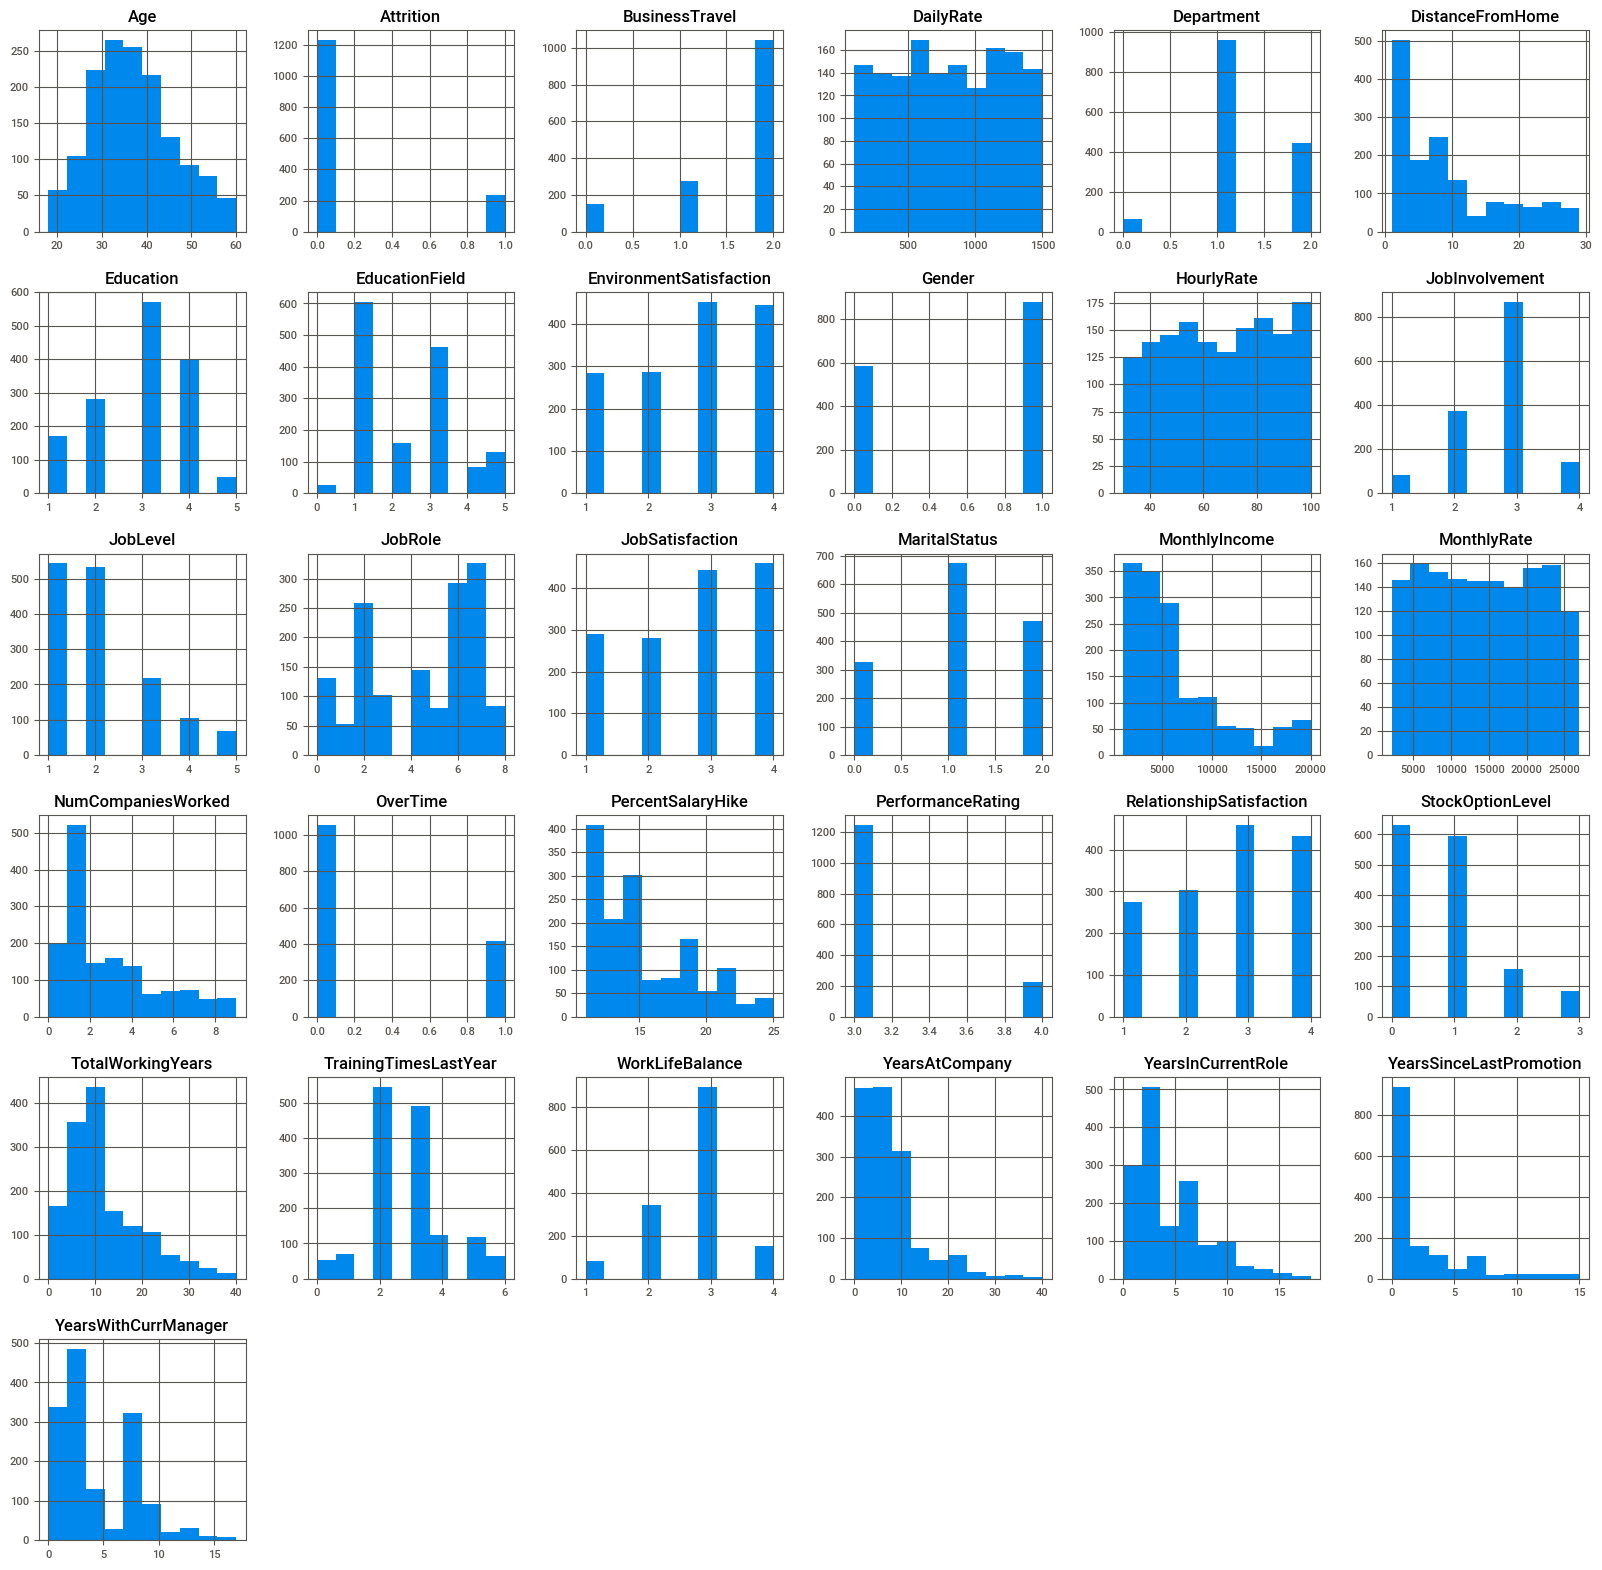

In [18]:
#Numerical features overview
empdf.hist(figsize=(20,20))
plt.show()

##### A few observations can be made based on the information and histograms for numerical features:

Many histograms are tail-heavy; indeed several distributions are right-skewed (e.g. MonthlyIncome DistanceFromHome, YearsAtCompany). Data transformation methods may be required to approach a normal distribution prior to fitting a model to the data.
Age distribution is a slightly right-skewed normal distribution with the bulk of the staff between 25 and 45 years old.
EmployeeCount and StandardHours are constant values for all employees. They're likely to be redundant features.
Employee Number is likely to be a unique identifier for employees given the feature's quasi-uniform distribution.

Monthly income is highly correlated with Job level.</br>
Job level is highly correlated with total working years and also years at company,years in current role </br>
Monthly income is highly correlated with total working hours.</br>
Age is also positively correlated with the Total working hours.</br>
Marital status and stock option level are negatively correlated</br>
Performance Rating is highly correlated with PercentSalary hike </br>

#### UNIVARIATE ANALYSIS

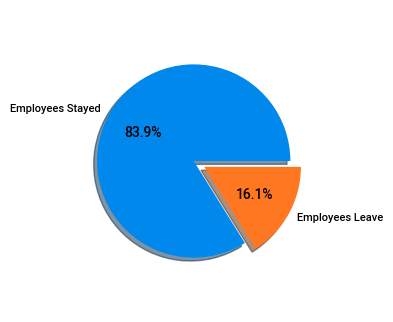

In [19]:
#plt.style.use('fivethirtyeight')
labelnames=["Employees Stayed","Employees Leave"]
values=[1233,237]
plt.pie(values,labels=labelnames,radius=0.8,shadow=True,autopct="%1.1f%%",explode=[0,.1])
plt.show()


#### Bivariate analysis

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

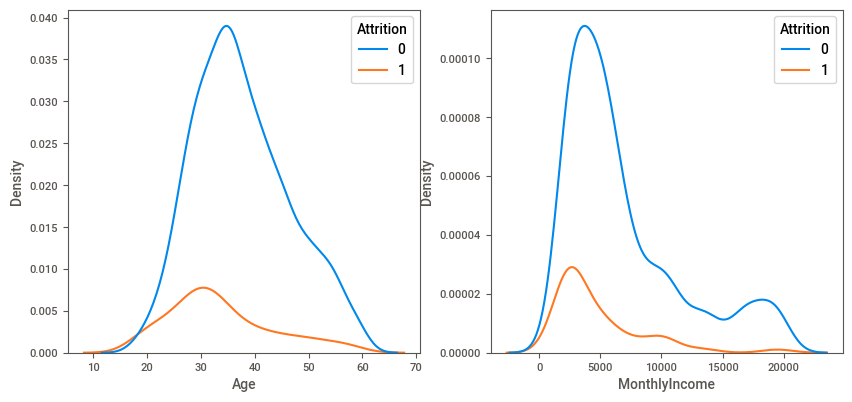

In [20]:
#1.Finding relationship between age and attrition.
plt.figure(figsize=(10,10))


plt.subplot(2,2,1)
sns.kdeplot(data=empdf,x='Age',hue='Attrition',)

plt.subplot(2,2,2)
sns.kdeplot(data=empdf,hue='Attrition',x='MonthlyIncome',)




c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

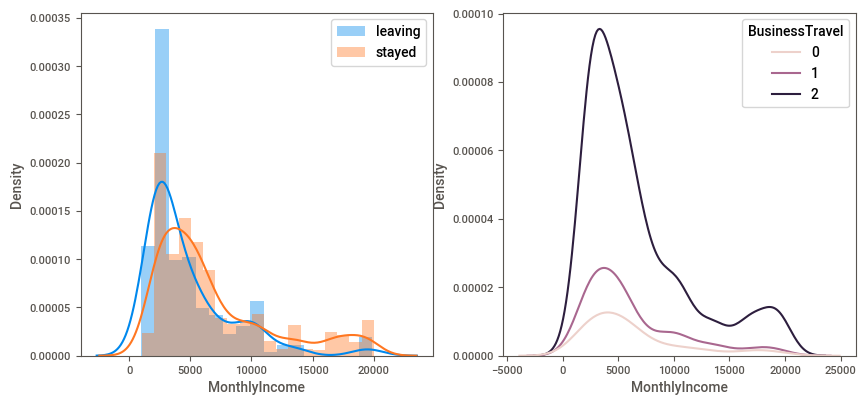

In [21]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(leftdf['MonthlyIncome'], label='leaving')
sns.distplot(stayeddf['MonthlyIncome'], label='stayed')
plt.legend()

plt.subplot(2,2,2)
sns.kdeplot(data=empdf,x='MonthlyIncome',hue='BusinessTravel',)



In [22]:
fig = px.histogram(empdf, x="DistanceFromHome", color="Attrition",)#histnorm='percent')
fig.show()


In [23]:
fig = px.histogram(empdf, x="BusinessTravel", color="Attrition",)#histnorm='percent')
fig.show()


In [24]:
fig = px.histogram(empdf, x="Department", color="Attrition",histnorm='density')
fig.show()

In [25]:
fig = px.histogram(empdf, x="JobRole", color = "Attrition",)#histnorm='percent')
fig.show()

In [26]:
fig = px.histogram(empdf, x="Gender", color = "Attrition",histnorm='percent')# maleleaving/totalleaving(male+female)*100 
fig.show()

In [27]:
fig = px.histogram(empdf, x="MaritalStatus", color = "Attrition",histnorm='percent',)#histnorm='percent')
fig.show()

In [28]:
fig = px.pie(empdf, values='JobSatisfaction', names='EducationField',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside',textinfo='percent+label',textfont_size=15,hole=.3)
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

<AxesSubplot:xlabel='JobLevel', ylabel='MonthlyIncome'>

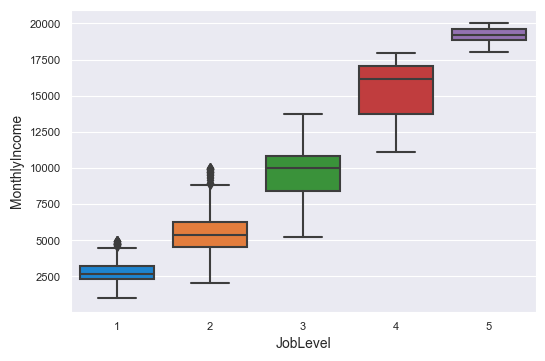

In [29]:
sns.set_style("darkgrid")
sns.boxplot(x = 'JobLevel', y = 'MonthlyIncome', data = empdf)

<AxesSubplot:xlabel='JobSatisfaction', ylabel='YearsAtCompany'>

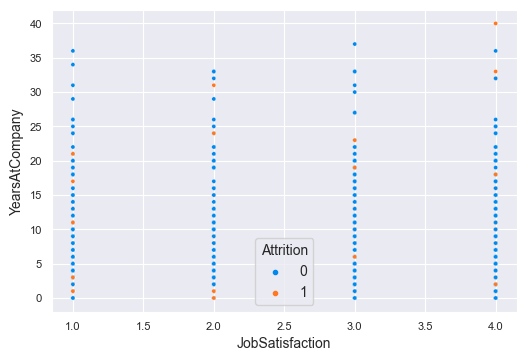

In [30]:
sns.scatterplot(y = 'YearsAtCompany', x = 'JobSatisfaction', data = empdf, hue="Attrition", ) #3variables

## Data Preprocessing

In [31]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix, roc_auc_score


In [32]:
x=empdf.drop(["Attrition"],axis=1,)
y= empdf["Attrition"]

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)
x_train.shape, x_test.shape

((1176, 30), (294, 30))

### dimensionality reduction(Feature selection)

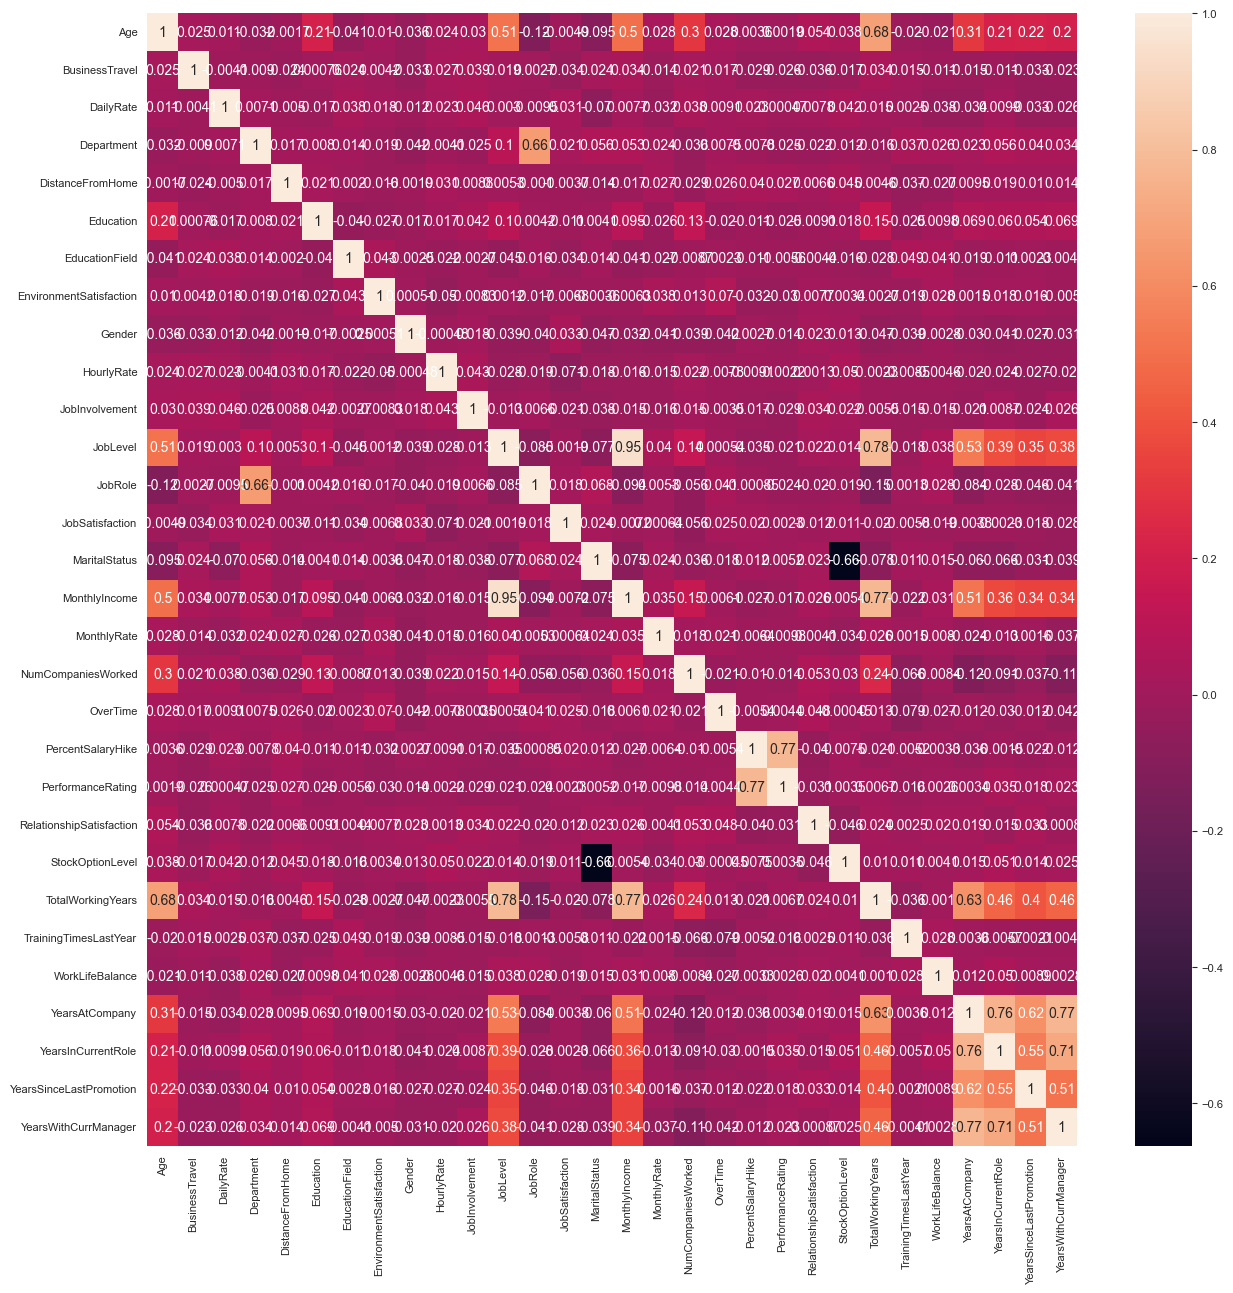

In [34]:
#Using Pearson Correlation
plt.figure(figsize=(15,15))
cor = x.corr()
sns.heatmap(cor, annot=True,)
plt.show()


In [35]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i] 
                col_corr.add(colname)
    return col_corr

In [36]:
corr_features = correlation(x, 0.7)
len(set(corr_features))


5

In [37]:
corr_features


{'MonthlyIncome',
 'PerformanceRating',
 'TotalWorkingYears',
 'YearsInCurrentRole',
 'YearsWithCurrManager'}

In [38]:
from sklearn.feature_selection import VarianceThreshold

In [39]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(x)

VarianceThreshold(threshold=0)

In [40]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [41]:
### Finding non constant features
sum(var_thres.get_support())

30

In [42]:
# Lets Find non-constant features 
len(x.columns[var_thres.get_support()])

30

In [43]:
constant_columns = [column for column in x.columns
                    if column not in x.columns[var_thres.get_support()]]

print(len(constant_columns))

0


In [44]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(x_train,y_train)

ExtraTreesClassifier()

In [45]:
print(model.feature_importances_)

[0.04093471 0.02550023 0.03284988 0.02705502 0.03959092 0.02602641
 0.02949199 0.03967201 0.02129071 0.03068925 0.03838088 0.03245977
 0.03904086 0.03386314 0.03475916 0.04197136 0.03170586 0.03191054
 0.06864556 0.02902517 0.01046587 0.0285311  0.02835123 0.0380269
 0.03127165 0.03567711 0.03450626 0.03153878 0.03223275 0.03453491]


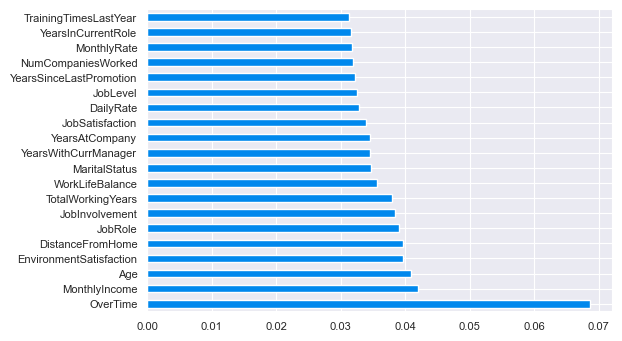

In [46]:
ranked_features=pd.Series(model.feature_importances_,index=x_train.columns)
ranked_features.nlargest(20).plot(kind='barh')
plt.show()

In [47]:
x1=ranked_features.nlargest(20)
print(x1)

OverTime                   0.068646
MonthlyIncome              0.041971
Age                        0.040935
EnvironmentSatisfaction    0.039672
DistanceFromHome           0.039591
JobRole                    0.039041
JobInvolvement             0.038381
TotalWorkingYears          0.038027
WorkLifeBalance            0.035677
MaritalStatus              0.034759
YearsWithCurrManager       0.034535
YearsAtCompany             0.034506
JobSatisfaction            0.033863
DailyRate                  0.032850
JobLevel                   0.032460
YearsSinceLastPromotion    0.032233
NumCompaniesWorked         0.031911
MonthlyRate                0.031706
YearsInCurrentRole         0.031539
TrainingTimesLastYear      0.031272
dtype: float64


In [48]:
x1 = df.loc[:,['OverTime','DistanceFromHome','Age','EnvironmentSatisfaction','TotalWorkingYears','MonthlyIncome','YearsAtCompany','JobRole',
'JobInvolvement','WorkLifeBalance','JobLevel','YearsInCurrentRole','DailyRate','MaritalStatus','JobSatisfaction','TrainingTimesLastYear',
'YearsSinceLastPromotion','MonthlyRate','StockOptionLevel','YearsWithCurrManager',]]
x1.head()



OverTime  DistanceFromHome  Age  EnvironmentSatisfaction  \
0         1                 1   41                        2   
1         0                 8   49                        3   
2         1                 2   37                        4   
3         1                 3   33                        4   
4         0                 2   27                        1   

   TotalWorkingYears  MonthlyIncome  YearsAtCompany  JobRole  JobInvolvement  \
0                  8           5993               6        7               3   
1                 10           5130              10        6               2   
2                  7           2090               0        2               2   
3                  8           2909               8        6               3   
4                  6           3468               2        2               3   

   WorkLifeBalance  JobLevel  YearsInCurrentRole  DailyRate  MaritalStatus  \
0                1         2                   4       1102              2   
1                3         2                   7        279              1   
2                3         1                   0       1373              2   
3                3         1                   7       1392              1   
4                3         1                   2        591              1   

   JobSatisfaction  TrainingTimesLastYear  YearsSinceLastPromotion  \
0                4                      0                        0   
1                2                      3                        1   
2                3                      3                        0   
3                3                      3                        3   
4                2                      3                        2   

   MonthlyRate  StockOptionLevel  YearsWithCurrManager  
0        19479                 0                     5  
1        24907                 1                     7  
2         2396                 0                     0  
3        23159                 0                     0  
4        16632                 1                     2

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x1,y,test_size=0.3,random_state=1)
x_train.shape, x_test.shape

((1029, 20), (441, 20))

### Feature scaling

In [50]:
from sklearn import preprocessing

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
scaler=StandardScaler()

In [53]:
x_train_scaled=scaler.fit_transform(x_train)

In [54]:
x_test_scaled=scaler.transform(x_test)

In [55]:
x_train_scaled

array([[-0.62493243,  1.74214028,  0.76233737, ...,  1.48153393,
         0.25895733, -0.60390875],
       [-0.62493243,  1.36616244,  0.32629226, ...,  1.6908117 ,
         0.25895733, -0.88896476],
       [ 1.600173  , -0.01242298,  1.52541631, ...,  0.66522495,
         0.25895733,  1.67653933],
       ...,
       [ 1.600173  , -0.38840082,  0.32629226, ...,  0.41182991,
        -0.93596235,  0.8213713 ],
       [ 1.600173  ,  0.86485865,  0.65332609, ..., -0.933607  ,
         0.25895733,  1.39148332],
       [-0.62493243,  0.48888081, -1.41788818, ..., -1.02309803,
         0.25895733, -1.17402077]])

In [56]:
x_test_scaled

array([[-6.24932429e-01,  1.12902967e-01, -7.41573316e-04, ...,
        -1.31781810e+00, -9.35962352e-01,  1.10642731e+00],
       [ 1.60017300e+00, -7.64378665e-01, -2.07195585e+00, ...,
         5.56886354e-01, -9.35962352e-01, -1.17402077e+00],
       [ 1.60017300e+00,  1.61681434e+00, -7.63820516e-01, ...,
        -4.03781010e-01, -9.35962352e-01, -8.88964758e-01],
       ...,
       [-6.24932429e-01, -8.89704612e-01, -1.09085435e+00, ...,
         7.37683365e-01,  2.58957326e-01, -1.17402077e+00],
       [-6.24932429e-01,  1.49148839e+00, -4.36786683e-01, ...,
        -1.10875890e-01,  2.64879668e+00,  2.53170736e+00],
       [-6.24932429e-01, -8.89704612e-01,  1.08269704e-01, ...,
         2.13860673e-01,  2.58957326e-01,  2.51259282e-01]])

### Model Building

In [57]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning:

The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.



In [58]:
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(x_train_scaled, x_test_scaled, y_train, y_test)
models

100%|██████████████████████████████████████████| 29/29 [00:05<00:00,  5.21it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
GaussianNB                         0.82               0.73     0.73      0.83   
NearestCentroid                    0.68               0.72     0.72      0.71   
SGDClassifier                      0.85               0.71     0.71      0.84   
Perceptron                         0.81               0.69     0.69      0.81   
AdaBoostClassifier                 0.85               0.67     0.67      0.84   
BernoulliNB                        0.82               0.66     0.66      0.82   
PassiveAggressiveClassifier        0.79               0.65     0.65      0.79   
LinearDiscriminantAnalysis         0.85               0.63     0.63      0.83   
LGBMClassifier                     0.85               0.63     0.63      0.83   
XGBClassifier                      0.85               0.62     0.62      0.82   
QuadraticDiscriminantAnalysis      0.81               0.62     0.62      0.80   
LogisticRegression                 0.85               0.61     0.61      0.82   
ExtraTreeClassifier                0.76               0.60     0.60      0.77   
CalibratedClassifierCV             0.85               0.59     0.59      0.81   
LinearSVC                          0.85               0.58     0.58      0.80   
BaggingClassifier                  0.83               0.58     0.58      0.79   
ExtraTreesClassifier               0.85               0.58     0.58      0.80   
DecisionTreeClassifier             0.77               0.58     0.58      0.76   
RandomForestClassifier             0.85               0.57     0.57      0.80   
SVC                                0.85               0.57     0.57      0.80   
KNeighborsClassifier               0.83               0.55     0.55      0.78   
RidgeClassifier                    0.83               0.53     0.53      0.77   
RidgeClassifierCV                  0.83               0.53     0.53      0.77   
DummyClassifier                    0.73               0.51     0.51      0.72   

                               Time Taken  
Model                                      
GaussianNB                           0.03  
NearestCentroid                      0.03  
SGDClassifier                        0.05  
Perceptron                           0.03  
AdaBoostClassifier                   0.44  
BernoulliNB                          0.04  
PassiveAggressiveClassifier          0.12  
LinearDiscriminantAnalysis           0.32  
LGBMClassifier                       0.38  
XGBClassifier                        0.76  
QuadraticDiscriminantAnalysis        0.09  
LogisticRegression                   0.20  
ExtraTreeClassifier                  0.03  
CalibratedClassifierCV               0.65  
LinearSVC                            0.14  
BaggingClassifier                    0.16  
ExtraTreesClassifier                 0.42  
DecisionTreeClassifier               0.04  
RandomForestClassifier               0.56  
SVC                                  0.11  
KNeighborsClassifier                 0.17  
RidgeClassifier                      0.20  
RidgeClassifierCV                    0.05  
DummyClassifier                      0.05

### Gaussian Naive Bayes Classifier

In [59]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train_scaled,y_train)
y_pred_gnb = gnb.predict(x_test_scaled)

In [60]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gnb))

Accuracy: 0.81859410430839


In [61]:
print(classification_report(y_test,y_pred_gnb))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       364
           1       0.48      0.60      0.53        77

    accuracy                           0.82       441
   macro avg       0.70      0.73      0.71       441
weighted avg       0.84      0.82      0.83       441



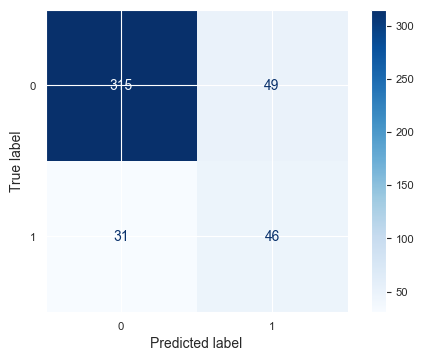

In [62]:
cnfgnb=plot_confusion_matrix(gnb,x_test_scaled,y_test,cmap='Blues')

In [63]:
cnfgnb1=cnfgnb.confusion_matrix

In [64]:
cnfgnb1

array([[315,  49],
       [ 31,  46]], dtype=int64)

In [65]:
# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

In [66]:
sensitivity =cnfgnb1[1,1]/(cnfgnb1[1,0]+cnfgnb1[1,1])
print('Sensitivity : ', sensitivity )

specificity = cnfgnb1[0,0]/(cnfgnb1[0,0]+cnfgnb1[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.5974025974025974
Specificity :  0.8653846153846154


### AdaBoostClassifier

In [67]:
from sklearn.ensemble import AdaBoostClassifier

In [68]:
adb = AdaBoostClassifier(n_estimators=50,learning_rate=1)

In [69]:
adb.fit(x_train_scaled,y_train)


AdaBoostClassifier(learning_rate=1)

In [70]:
y_pred_adb = adb.predict(x_test_scaled)

In [71]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_adb))

Accuracy: 0.8526077097505669


In [72]:
print(classification_report(y_test,y_pred_adb))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       364
           1       0.62      0.39      0.48        77

    accuracy                           0.85       441
   macro avg       0.75      0.67      0.70       441
weighted avg       0.84      0.85      0.84       441



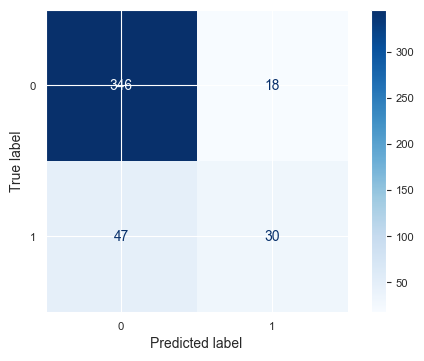

In [73]:
cnfadb=plot_confusion_matrix(adb,x_test_scaled,y_test,cmap='Blues')

In [74]:
cnfadb1=cnfadb.confusion_matrix

In [75]:
cnfadb1

array([[346,  18],
       [ 47,  30]], dtype=int64)

### Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
logreg=LogisticRegression()

In [78]:
logreg.fit(x_train_scaled,y_train)

LogisticRegression()

In [79]:
y_pred_logistic=logreg.predict(x_test_scaled)

In [80]:
accuracy_score(y_test, y_pred_logistic)

0.8526077097505669

In [81]:
print(classification_report(y_test,y_pred_logistic))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       364
           1       0.73      0.25      0.37        77

    accuracy                           0.85       441
   macro avg       0.80      0.61      0.64       441
weighted avg       0.84      0.85      0.82       441



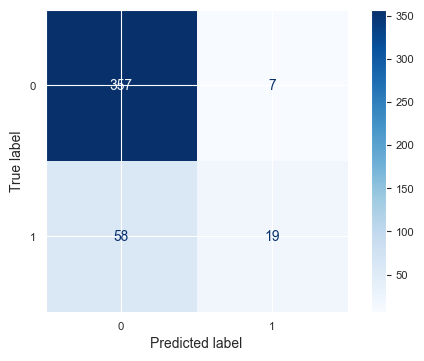

In [82]:
cnflog=plot_confusion_matrix(logreg,x_test_scaled,y_test,cmap='Blues')

In [83]:
cnflog.confusion_matrix

array([[357,   7],
       [ 58,  19]], dtype=int64)

### RandomForestClassifier

In [84]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train_scaled, y_train)

RandomForestClassifier()

In [85]:
y_pred_rfc=rfc.predict(x_test_scaled)

In [86]:
accuracy_score(y_test,y_pred_rfc)

0.8435374149659864

In [87]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       364
           1       0.75      0.16      0.26        77

    accuracy                           0.84       441
   macro avg       0.80      0.57      0.59       441
weighted avg       0.83      0.84      0.80       441



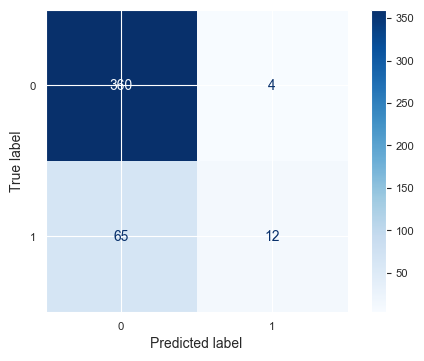

In [88]:
cnfrfc=plot_confusion_matrix(rfc,x_test_scaled,y_test,cmap='Blues')

In [89]:
cnfrfc.confusion_matrix

array([[360,   4],
       [ 65,  12]], dtype=int64)

### ROC Curve

let's check tradeoff between sensitivity and specificity.


#### ROC Curve of AdaBoostClassifier,LogisticRegression,RandomForestClassifier and Naive Bayes Classifier

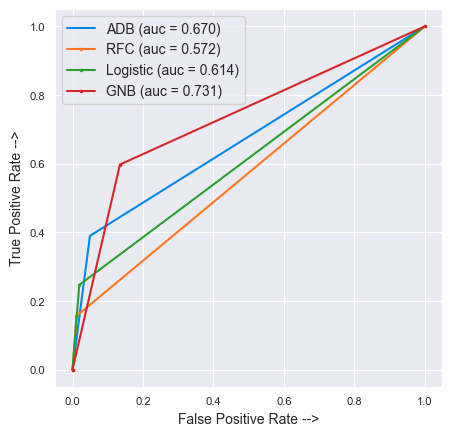

In [90]:
from sklearn.metrics import roc_curve, auc

gnb_fpr, gnb_tpr, threshold = roc_curve(y_test, y_pred_gnb)
auc_gnb = auc(gnb_fpr, gnb_tpr)

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

adb_fpr, adb_tpr, threshold = roc_curve(y_test, y_pred_adb)
auc_adb = auc(adb_fpr, adb_tpr)

rfc_fpr, rfc_tpr, threshold = roc_curve(y_test, y_pred_rfc)
auc_rfc = auc(rfc_fpr, rfc_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(adb_fpr, adb_tpr, linestyle='-', label='ADB (auc = %0.3f)' % auc_adb)
plt.plot(rfc_fpr, rfc_tpr, marker='.', label='RFC (auc = %0.3f)' % auc_rfc)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.plot(gnb_fpr, gnb_tpr, marker='.', label='GNB (auc = %0.3f)' % auc_gnb)


plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()


## Saving model using pickle

In [91]:
import pickle

In [92]:
filename="gnbmodel5"
pickle.dump(gnb,open(filename,'wb'))

In [93]:
openmodel=open('gnbmodel5','rb')
mymodel=pickle.load(openmodel)

In [94]:
x_test[:2]

OverTime  DistanceFromHome  Age  EnvironmentSatisfaction  \
1291         0                10   37                        4   
1153         1                 3   18                        2   

      TotalWorkingYears  MonthlyIncome  YearsAtCompany  JobRole  \
1291                 10           4213              10        4   
1153                  0           1569               0        8   

      JobInvolvement  WorkLifeBalance  JobLevel  YearsInCurrentRole  \
1291               3                1         2                   3   
1153               3                4         1                   0   

      DailyRate  MaritalStatus  JobSatisfaction  TrainingTimesLastYear  \
1291        370              2                1                      4   
1153        544              2                4                      2   

      YearsSinceLastPromotion  MonthlyRate  StockOptionLevel  \
1291                        0         4992                 0   
1153                        0        18420                 0   

      YearsWithCurrManager  
1291                     8  
1153                     0

In [95]:
y_test[:2]

1291    1
1153    1
Name: Attrition, dtype: int32